In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('USA_Housing.csv')
data.head(4)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

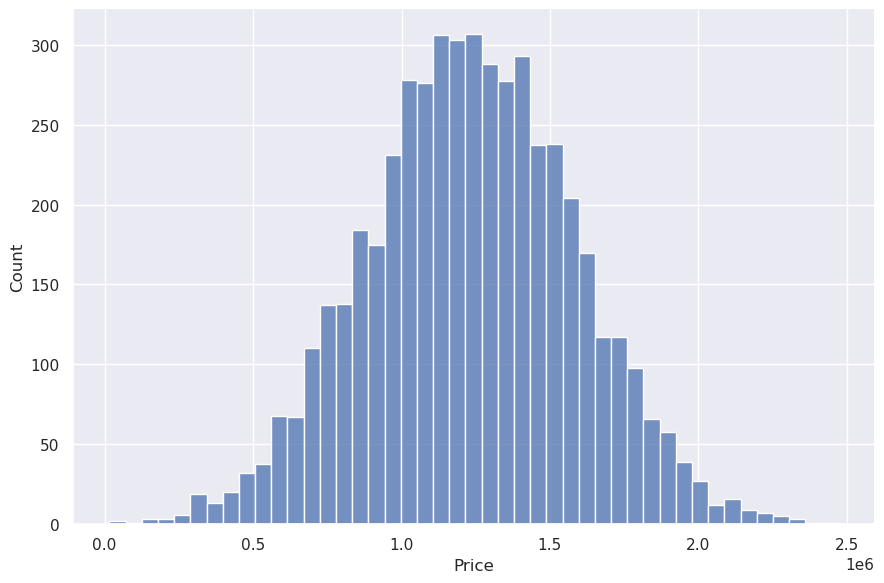

In [6]:


sns.set_theme()
sns.displot(data["Price"], height=6, aspect=1.5)


<Axes: xlabel='Price', ylabel='Avg. Area Income'>

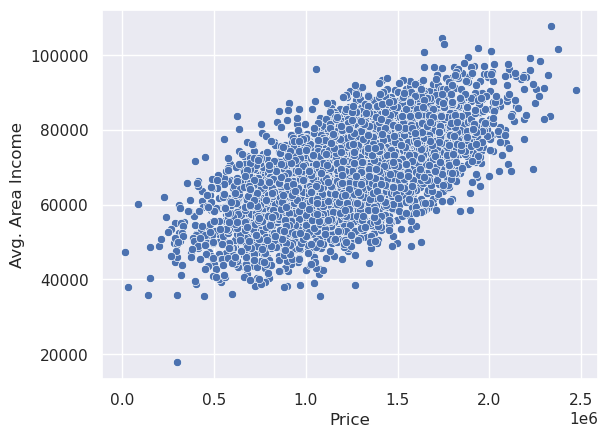

In [7]:
sns.scatterplot(data=data,x="Price",y="Avg. Area Income")

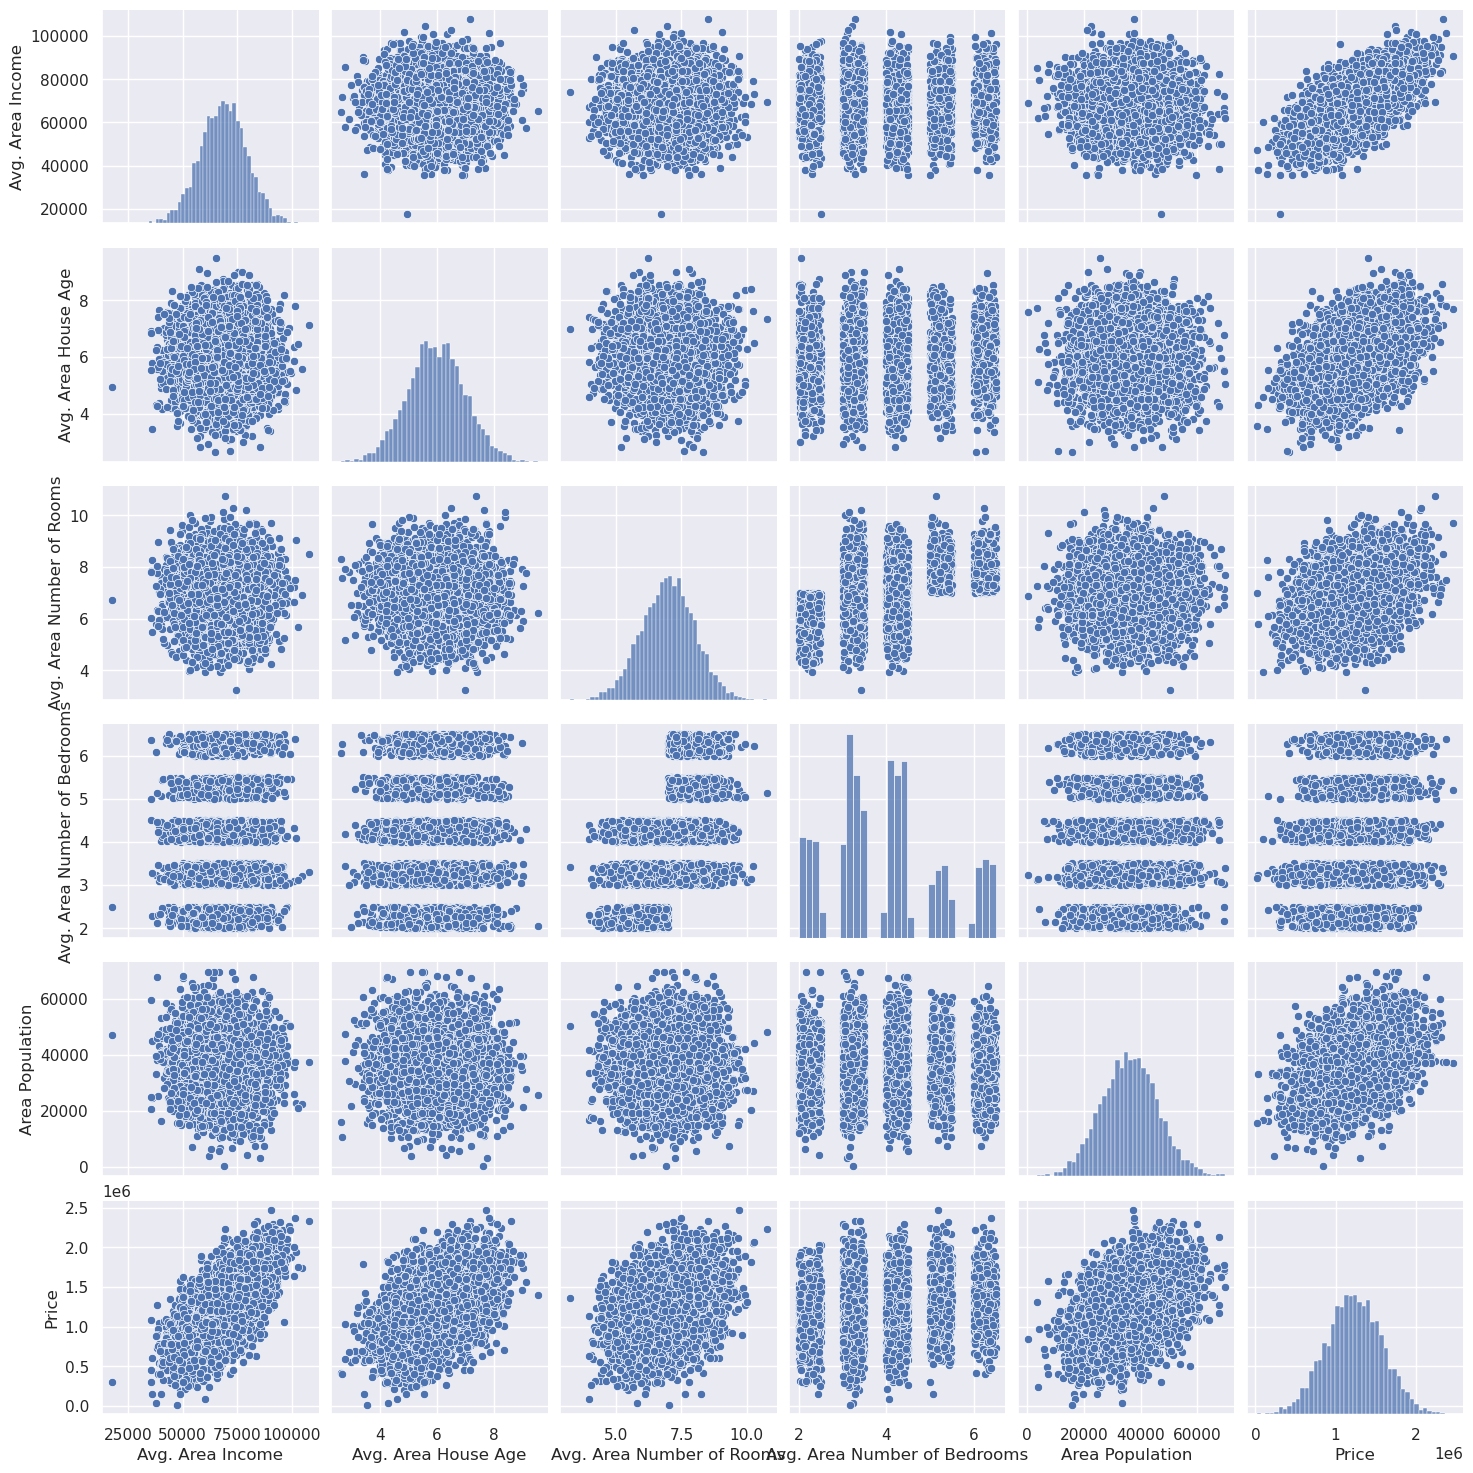

In [8]:
sns.pairplot(data)

<Axes: >

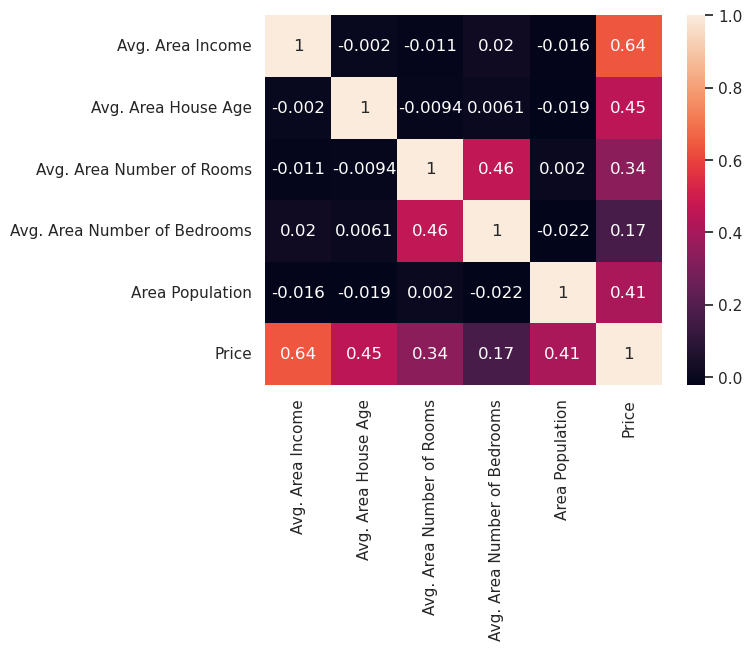

In [9]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [11]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [17]:
# feature varable of the dataset 
X= data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
# target value of the dataset 
y=data["Price"]

In [21]:
# now we have to split the data in to test and train 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [22]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1522,67716.748222,6.431119,7.753989,5.28,40562.188948
835,78095.352630,6.837193,7.119862,3.00,32346.434992
358,55577.071754,6.533916,7.162536,3.47,19560.012414
138,63876.059910,7.080219,7.187433,3.37,38052.876443
299,52188.118727,5.636892,5.807401,4.03,42495.754677
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


In [23]:
y_train

1522    1.535782e+06
835     1.538923e+06
358     8.180579e+05
138     1.388530e+06
299     7.838084e+05
            ...     
4426    1.023944e+06
466     1.223101e+06
3092    1.318598e+06
3772    1.708631e+06
860     1.060898e+06
Name: Price, Length: 3350, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

-2638142.1104297307


In [31]:
lm.coef_

array([2.15898874e+01, 1.66102501e+05, 1.19895936e+05, 1.90107101e+03,
       1.52315025e+01])

In [41]:
pd.DataFrame(data=lm.coef_.reshape(1,5),columns=X_train.columns)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,21.589887,166102.501246,119895.936402,1901.071012,15.231503


In [42]:
pd.DataFrame(data=lm.coef_,index=X_train.columns)

,0
Avg. Area Income,21.589887
Avg. Area House Age,166102.501246
Avg. Area Number of Rooms,119895.936402
Avg. Area Number of Bedrooms,1901.071012
Area Population,15.231503


In [47]:
prediction = lm.predict(X_test)
prediction

array([1310035.96931578, 1238811.85458543, 1245265.83079141, ...,
       1024496.94962118, 1548581.80349715, 1032639.16178956])

In [45]:
lm.score(X_test,y_test) #the value one is best 

0.9165334724138277

<Axes: xlabel='Price'>

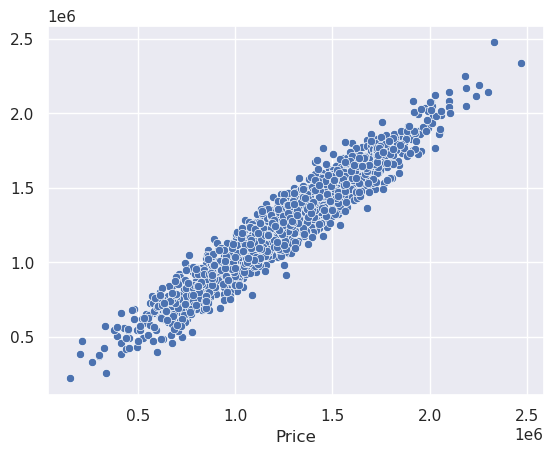

In [50]:
sns.scatterplot(x=y_test,y=prediction)
# if the true value and the predicted value make the linear line than the model is best for this dataset

<Axes: xlabel='Price', ylabel='Count'>

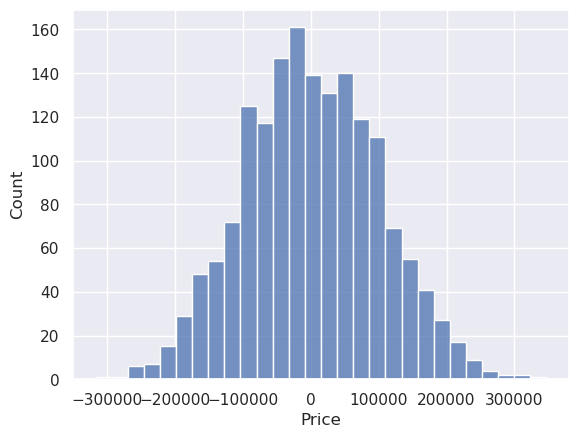

In [52]:
# if the error is distributed this is a good signe
sns.histplot(y_test -prediction)


In [53]:
# model evaulation 
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error

In [54]:
mean_absolute_error(y_test,prediction)

80893.81190770202

In [55]:
mean_squared_error(y_test,prediction)

10013679978.582806

In [56]:
root_mean_squared_error(y_test,prediction)

100068.3765161742